##**Klasifikasi Berat Badan Obesitas menggunakan metode Decision Tree**

### **1. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### **2. Import Data**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Label :

1 - Underweight

2 - Normal weight

3 - Overweight

4 - Obesity

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kecerdasan_Buatan/Obesity_Data.csv', index_col=0)
df.head()

,Jenis_Kelamin,Tinggi_Badan,Berat_Badan,Label
1,Laki - Laki,174,72,2
2,Laki - Laki,164,90,4
3,Perempuan,168,73,3
4,Laki - Laki,168,85,3
5,Laki - Laki,184,69,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jenis_Kelamin  1000 non-null   object
 1   Tinggi_Badan   1000 non-null   int64 
 2   Berat_Badan    1000 non-null   int64 
 3   Label          1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 39.1+ KB


In [ ]:
df.shape

(1000, 4)

In [ ]:
df.Label.value_counts()

,count
Label,
2,371
3,295
4,191
1,143


### **3. Cleaning Data**

In [ ]:
df.isnull().sum()

,0
Jenis_Kelamin,0
Tinggi_Badan,0
Berat_Badan,0
Label,0


In [ ]:
df.duplicated().sum()

np.int64(124)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(876, 4)

### **4. Exploratory Data Analysis (EDA)**

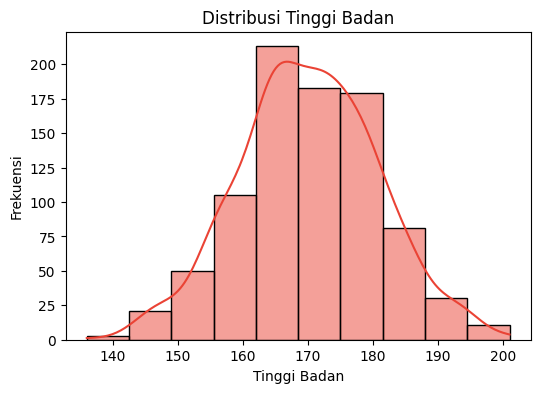

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Tinggi_Badan', bins=10, kde=True, color='#EA4335')

plt.title('Distribusi Tinggi Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
fig=px.sunburst(df,path=['Jenis_Kelamin','Label'],values=df.value_counts().values,color_discrete_sequence=['#F66095','#2BCDC1'])
fig.show()

### **5. Preparation Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()

df['Jenis_Kelamin'] = gender_encoder.fit_transform(df['Jenis_Kelamin'])

**jenis kelamin :**

0 - Laki - Laki

1 - Perempuan

In [ ]:
df.head()

,Jenis_Kelamin,Tinggi_Badan,Berat_Badan,Label
1,0,174,72,2
2,0,164,90,4
3,1,168,73,3
4,0,168,85,3
5,0,184,69,2


In [ ]:
X = df.drop(columns=['Label'])
y = df['Label']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (876, 3)
y :  (876,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **6. Modeling & Evaluation**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Akurasi Model Decision Tree : {:.2f}%'.format(decision_tree_accuracy * 100))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        32
           2       0.98      0.93      0.96        58
           3       0.88      0.98      0.93        47
           4       0.97      0.92      0.95        39

    accuracy                           0.95       176
   macro avg       0.95      0.95      0.95       176
weighted avg       0.95      0.95      0.95       176

Akurasi Model Decision Tree : 94.89%


### **7. Testing**

In [ ]:
new_data = pd.DataFrame({
    'Jenis_Kelamin' : ["Perempuan"],
    'Tinggi_Badan' : [151],
    'Berat_Badan' : [64]
})

In [ ]:
new_data['Jenis_Kelamin'] = gender_encoder.fit_transform(new_data['Jenis_Kelamin'])

In [ ]:
new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)
print("Prediksi BMI:", prediction[0])

Prediksi BMI: 3
